#  간단한 회귀 알고리즘 구현하기

학습 횟수 : 0
학습 횟수 : 100
학습 횟수 : 200
학습 횟수 : 300
학습 횟수 : 400
학습 횟수 : 500
학습 횟수 : 600
학습 횟수 : 700
학습 횟수 : 800
학습 횟수 : 900
1000번의 학습 이후의 회귀 알고리즘 결과
beta_0: [[2.39145777]] beta_1: [[0.37251578]]


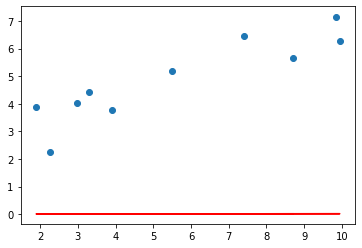

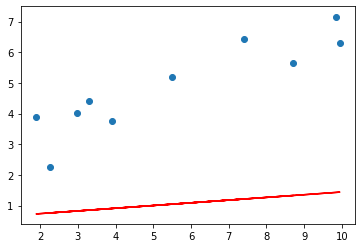

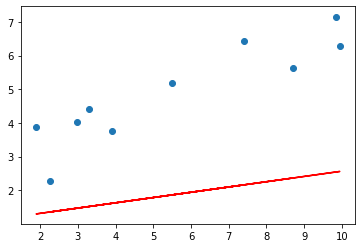

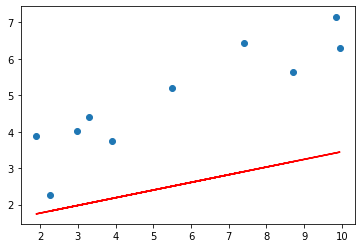

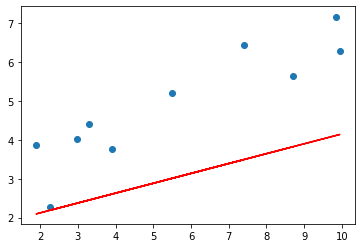

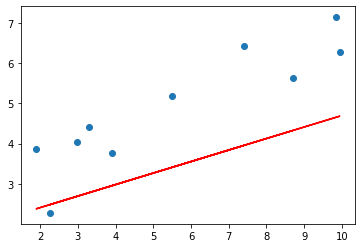

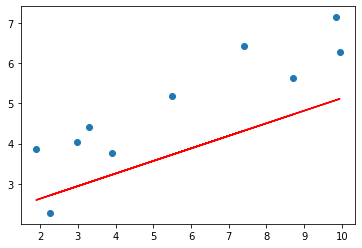

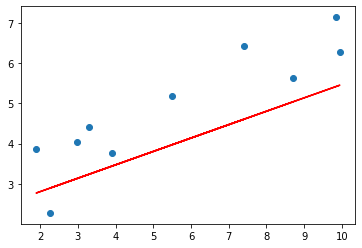

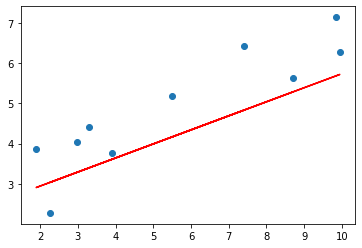

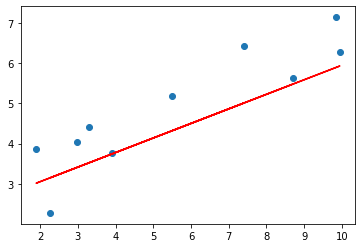

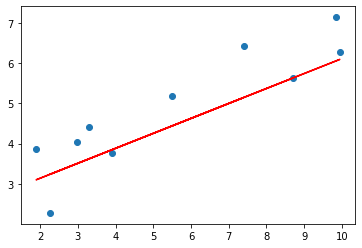

In [3]:
import numpy as np
import matplotlib.pyplot as plt


# 학습을 위해 필요한 파라미터와 데이터입니다. 
lr = 1e-4
iteration = 1000

x = np.array([[8.70153760], [3.90825773], [1.89362433], [3.28730045], [7.39333004], [2.98984649], [2.25757240], [9.84450732], [9.94589513], [5.48321616]])
y = np.array([[5.64413093], [3.75876583], [3.87233310], [4.40990425], [6.43845020], [4.02827829], [2.26105955], [7.15768995], [6.29097441], [5.19692852]])

## 1. 입력값(x)과 beta_0,beta_1를 바탕으로 예측값을 출력하는 함수를 만들어 봅니다.
def prediction(beta_1,beta_0,x):
    # beta_1, beta_0, x를 받아서 예측값을 계산하는 식을 만듭니다.
    pred_y = beta_0 + beta_1 * x
    return pred_y

## beta_0,beta_1의 값을 어느정도 업데이트할 지를 정해주는 함수를 만들어 봅니다.
## 이 함수는 이미 정의되어 있습니다.
def update_beta(beta_0,beta_1,x,loss,lr):
    ## beta_0를 업데이트하는 규칙을 만듭니다..
    delta_0 = -(lr*(2/len(loss))*(np.dot(x.T, loss)))
    ## beta_1를 업데이트하는 규칙을 만듭니다.
    delta_1 = -(lr*(2/len(loss))*np.sum(loss))
    
    return delta_0, delta_1

# 2. 반복횟수만큼 오차(loss)를 계산하고 beta_0,beta_1의 값을 변경하는 함수를 만들어 봅니다.
def gradient_descent(x, y, iters):
    ## 초기값 beta_0 = 0, beta_1 = 0
    beta_0 = np.zeros((1,1))
    beta_1 = np.zeros((1,1))    
    
    for i in range(iters):
        # 3-1.실제 값 y와 prediction 함수를 통해 예측한 예측값의 차이를 loss로 정의합니다.
        loss = y - prediction(beta_1, beta_0, x)
        # print(loss)
        # 3-2.위에서 정의한 함수를 이용하여 beta_0와 beta_1 값의 변화값을 저장합니다.
        beta0_delta, beta1_delta = update_beta(beta_0,beta_1,x,loss,lr)
        ##beta_0와 beta_1의 값을 변화시킵니다.
        beta_0 -= beta0_delta
        beta_1 -= beta1_delta
        
        # 100번의 학습마다 그래프 출력하기
        if i%100==0:
            print("학습 횟수 :",i)
            plotting_graph(x,y,beta_0,beta_1)
        
    return beta_0, beta_1

##그래프를 시각화하는 함수입니다.
def plotting_graph(x,y,beta_0,beta_1):
    y_pred=beta_1[0,0]*x+beta_0
    fig = plt.figure()
    plt.scatter(x, y)
    plt.plot(x, y_pred,c='r')
    #plt.savefig("test.png")
    

##실제 진행 절차를 확인할 수 있는 main함수 입니다.
def main():
    beta_0, beta_1 = gradient_descent(x, y, iters=iteration)
    
    print("1000번의 학습 이후의 회귀 알고리즘 결과")
    print("beta_0:",beta_0, "beta_1:",beta_1)
    plotting_graph(x,y,beta_0,beta_1)
    return beta_0, beta_1

if __name__=="__main__":
    main()

#  단순 선형 회귀 모델 구현하기

> beta_0 :  [2.89804615]
> beta_1 :  [[2.90298892]]
> 모델 평가 점수 : 0.8948735905242707


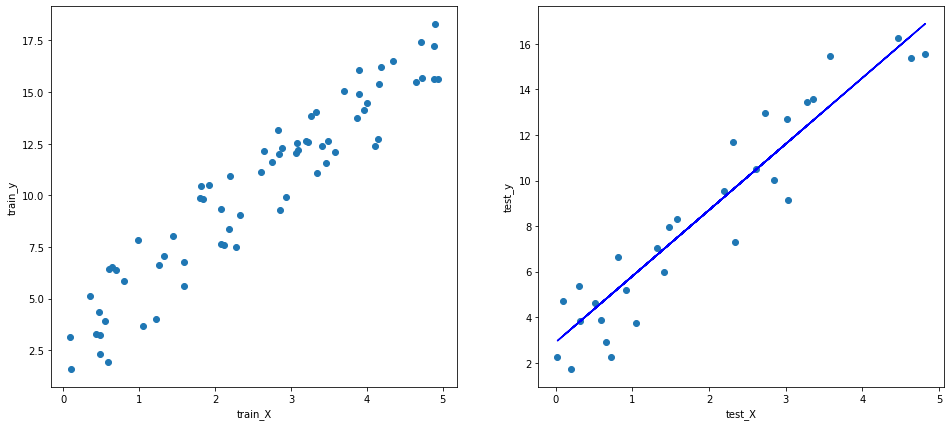

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# 데이터를 분리하는 모듈을 불러옵니다.
from sklearn.model_selection import train_test_split

# 사이킷런에 구현되어 있는 회귀 모델을 불러옵니다.
from sklearn.linear_model import LinearRegression

#  데이터의 랜덤 생성을 위한 seed를 설정합니다. 
np.random.seed(0)

## 데이터 x와 y를 생성합니다.
X = 5*np.random.rand(100,1)
y = 3*X + 5*np.random.rand(100,1)

# 1. 생성한 데이터를 학습용 데이터와 테스트용 데이터로 분리합니다. 
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=0)

# 2. LinearRegression 클래스를 불러와서 회귀 모델을 만들어 봅니다.
simplelinear = LinearRegression()


# 3. 회귀 모델을 학습용 데이터 train_X와 train_y에 맞추어 학습시킵니다.
simplelinear.fit(train_X, train_y)


# 4. 학습된 모델을 활용하여 테스트 데이터 test_X의 회귀 결과를 반환합니다.
predicted = simplelinear.predict(test_X)


# 5. 학습된 모델의 평가 결과를 확인해보세요. 
model_score = simplelinear.score(test_X,test_y)


# 6. 회귀 식 beta_0와 beta_1 을 출력을 통해 확인해봅니다. 
beta_0 = simplelinear.intercept_
beta_1 = simplelinear.coef_

print("> beta_0 : ",beta_0)
print("> beta_1 : ",beta_1)


print("> 모델 평가 점수 :", model_score)

## 그래프로 나타내어 봅니다.
def plotting_graph():
    fig, ax = plt.subplots(1,2, figsize=(16, 7))

    ax[0].scatter(train_X,train_y)
    ax[1].scatter(test_X,test_y)
    ax[1].plot(test_X, predicted, color='b')
    
    
    ax[0].set_xlabel('train_X')
    ax[0].set_ylabel('train_y')
    ax[1].set_xlabel('test_X')
    ax[1].set_ylabel('test_y')


plotting_graph()

#  다중 선형 회귀 모델 구현하기

In [5]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# boston 데이터를 위한 모듈을 불러옵니다. 
from sklearn.datasets import load_boston

# 1. sklearn의 boston 데이터를 (X, y) 형태로 불러옵니다.
X, y  = load_boston(return_X_y = True)

# 불러온 데이터의 입력값 X의 개수를 출력을 통해 확인합니다. 
print("데이터의 입력값(X)의 개수 :", X.shape[0])


# 2. 불러온 데이터를 학습용 데이터와 테스트용 데이터로 분리합니다. 
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=100)


# 3. LinearRegression 클래스를 불러와 다중 선형회귀 모델을 만들어 봅니다.
multilinear = LinearRegression()


# 4. 회귀 모델을 학습용 데이터에 맞추어 학습시킵니다.
multilinear.fit(train_X, train_y)


# 5. 학습된 모델을 바탕으로, 테스트 데이터의 회귀 결과를 반환합니다.
predicted = multilinear.predict(test_X)


# 6. 학습된 모델의 평가 결과를 출력을 통해 확인해보세요. 
model_score = multilinear.score(test_X,test_y)

print("\n> 모델 평가 점수 :", model_score)

# 7. 최적의 beta_i들과 beta_0를 출력을 통해 확인해봅니다. 
beta_0 = multilinear.intercept_
beta_i_list = multilinear.coef_

print("\n> beta_0 : ",beta_0)
print("> beta_i_list : ",beta_i_list)

데이터의 입력값(X)의 개수 : 506

> 모델 평가 점수 : 0.7555033086871308

> beta_0 :  36.33377028550779
> beta_i_list :  [-8.14896492e-02  4.80407782e-02 -5.47150249e-03  3.06260576e+00
 -1.61368815e+01  3.67245067e+00 -8.51525259e-03 -1.51740854e+00
  2.87271007e-01 -1.21207598e-02 -9.24160757e-01  9.53460812e-03
 -4.85895548e-01]


#  다항 회귀 모델 구현하기

변환 이후 X 데이터
 [[2.64644051 7.00364738]
 [3.1455681  9.89459867]
 [2.80829013 7.88649344]]


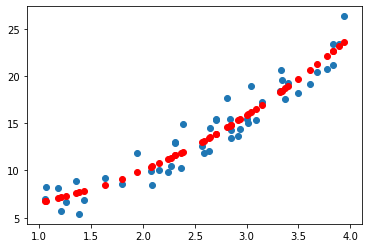

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 다항 회귀의 입력값을 변환하기 위한 모듈을 불러옵니다.
from sklearn.preprocessing import PolynomialFeatures

# 랜덤 데이터를 생성하기 위한 시드 값을 설정합니다.
np.random.seed(0)

## 데이터 x와 y를 생성합니다.
X = 3*np.random.rand(50, 1) + 1
y = X**2 + X + 2 +5*np.random.rand(50,1) 

# 1.데이터 내의 각 입력값을 제곱하여 새로운 변수를 추가하는 PolynomialFeature객체를 생성합니다.(degree=2, include_bias=False)
poly_feat =  PolynomialFeatures(degree=2, include_bias = False)


# 2.각 데이터를 제곱하고 이를 X에 추가시킨 후 poly_X에 저장합니다.(예: x=[0, 1, 2, 3] >> poly_X=[[0,0], [1,1], [2,4], [3, 9]]) 
poly_X = poly_feat.fit_transform(X)


print("변환 이후 X 데이터\n", poly_X[:3])

# 3. 다중 선형회귀 모델을 생성합니다.
linear_model = LinearRegression()

# 4. 변환된 전체 데이터와 y를 모델에 학습시킵니다.
linear_model.fit(poly_X, y)

# 5. 회귀 예측 결과값을 predicted 에 저장합니다. 
predicted = linear_model.predict(poly_X)

def plotting_graph(x,y,predicted):
    fig = plt.figure()
    plt.scatter(x, y)
    plt.scatter(x, predicted,c='r')

plotting_graph(X,y,predicted)

#  과적합 방지 기법 - 교차 검증

In [10]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

# sklearn의 KFold 모듈 불러오기
from sklearn.model_selection import KFold

# 1. boston 데이터 세트 불러오기
X, y = load_boston(return_X_y = True)

# 2. 불러온 데이터를 학습용 데이터와 테스트용 데이터로 분리하기
train_X , test_X , train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=100)

# 회귀에 사용할 모델 불러오기
model = LinearRegression()

# 3. 5개의 Fold로 나눌 수 있도록 정의합니다.
kfold = KFold(5)

n_iter = 0
model_scores = []


# Data를 K만큼 나누기
for train_idx, val_idx in kfold.split(train_X):
    
    # 4. 학습용과 검증용으로 나눈 데이터를 저장합니다.
    X_train, X_val =  train_X[train_idx],train_X[val_idx] 
    y_train, y_val =  train_y[train_idx],train_y[val_idx]


    # 5. 학습용 데이터로 모델 학습을 진행합니다.
    model.fit(X_train, y_train)

    # 각 Iter 별 모델 평가 점수를 측정하여 변수 score에 저장합니다.
    predicted = model.predict(X_val)
    score = model.score(X_val,y_val) 
    
    train_size = X_train.shape[0]
    val_size = X_val.shape[0]

    print("Iter : {0} K fold Cross-Validation Score : {1}, Train Data 크기 : {2}, Validation Data 크기 : {3}"
          .format(n_iter, score, train_size, val_size))
    
    n_iter += 1
    model_scores.append(score)

print("\n> 평균 검증 모델 점수 : ", np.mean(model_scores)) # 평균 모델 점수 출력
print("> 테스트 데이터 모델 점수 : ", model.score(test_X,test_y))

Iter : 0 K fold Cross-Validation Score : 0.6225277546797331, Train Data 크기 : 323, Validation Data 크기 : 81
Iter : 1 K fold Cross-Validation Score : 0.7158099616179285, Train Data 크기 : 323, Validation Data 크기 : 81
Iter : 2 K fold Cross-Validation Score : 0.7986314390280324, Train Data 크기 : 323, Validation Data 크기 : 81
Iter : 3 K fold Cross-Validation Score : 0.6952286567450795, Train Data 크기 : 323, Validation Data 크기 : 81
Iter : 4 K fold Cross-Validation Score : 0.7006957536853036, Train Data 크기 : 324, Validation Data 크기 : 80

> 평균 검증 모델 점수 :  0.7065787131512155
> 테스트 데이터 모델 점수 :  0.7572608014205975


#  릿지 라쏘 (아직)

In [ ]:
import elice_utils
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
eu = elice_utils.EliceUtils()

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.datasets import load_boston

# 1. 데이터와 변수 이름을 불러오는 함수를 완성합니다. 
def load_data():
    # 데이터를 불러옵니다.
    X, y = None
    
    # 데이터 변수 이름들을 저장합니다.
    feature_names = None
    
    return X,y,feature_names
    
# 2. 릿지 회귀를 구현하고 데이터를 바탕으로 학습시킨 모델을 반환하는 함수를 완성합니다.
def Ridge_regression(X, y):
    
    # 릿지 회귀를 구현합니다.
    ridge_reg = None
    
    # 구현한 릿지 회귀를 이용하여 x,y 데이터를 바탕으로 학습시킵니다.
    None
    
    return ridge_reg
    
# 3. 라쏘 회귀를 구현하고 데이터를 바탕으로 학습시킨 모델을 반환하는 함수를 완성합니다.
def Lasso_regression(X, y):
    
    # 라쏘 회귀를 구현합니다.
    lasso_reg = None
    
    # 구현한 라쏘 회귀를 이용하여 x,y 데이터를 바탕으로 학습시킵니다.
    None
    
    return lasso_reg
    
# 각 변수의 beta_i 크기를 시각화하는 함수입니다.
def plot_graph(coef):
    fig = plt.figure()
    plt.ylim(-10,4)
    coef.plot(kind='bar')
    
    plt.savefig("result.png")
    eu.send_image("result.png")
    
def main():
    
    X,y,feature_names = load_data()
    
    # 4. 각 회귀를 반환하는 함수 호출하기
    ridge_reg = None
    lasso_reg = None
    
    ## Ridge 회귀의 beta_i의 크기를 저장합니다.
    ridge_coef = pd.Series(ridge_reg.coef_, feature_names).sort_values()
    print("Ridge 회귀의 beta_i\n", ridge_coef)
    
    ## Lasso 회귀의 beta_i의 크기를 저장합니다.
    lasso_coef = pd.Series(lasso_reg.coef_, feature_names).sort_values()
    print("Lasso 회귀의 beta_i\n", lasso_coef)
    
    # beta_i 크기 시각화하기
    plot_graph(ridge_coef)
    plot_graph(lasso_coef)

if __name__=="__main__":
    main()

#  엘라스틱넷 회귀 (아직)

In [ ]:
import elice_utils
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
eu = elice_utils.EliceUtils()

from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston

# 1. 데이터와 변수 이름을 불러오는 함수를 완성합니다. 
def load_data():
    # 데이터를 불러옵니다.
    X, y = None
    
    # 데이터 변수 이름들을 저장합니다.
    feature_names = None
    
    return X, y,feature_names
    
# 2. 엘라스틱넷 회귀를 구현하고 데이터를 학습시킨 모델을 반환하는 함수를 완성합니다.
def ElasticNet_regression(X, y):
    
    # 엘라스틱넷 회귀를 구현합니다.
    ElasticNet_reg = None
    
    # 구현한 엘라스틱넷 회귀를 이용하여 X,y 데이터를 바탕으로 학습시킵니다.
    None
    
    return ElasticNet_reg
    
    
# 각 변수의 beta_i 크기를 시각화하는 함수입니다.
def plot_graph(coef):
    coef.plot(kind='bar')
    
    plt.savefig("result.png")
    eu.send_image("result.png")
    
def main():
    
    X,y,feature_names = load_data()
    
    # 3. 학습용 데이터와 테스트용 데이터를 분리합니다.
    train_X, test_X, train_y, test_y = None
    
    # 4. 엘라스틱 넷 회귀를 구현하는 함수 호출하기
    elasticnet_reg = None
    
    # 엘라스틱 넷 회귀 모델 평가 점수 출력하기
    score = elasticnet_reg.score(test_X,test_y)
    print("모델 평가 점수 :",score)
    
    ## Elasticnet 회귀의 beta_i의 크기를 저장합니다.
    ElasticNet_coef = pd.Series(elasticnet_reg.coef_, feature_names).sort_values()
    print("ElasticNet 회귀의 beta_i\n", ElasticNet_coef)
    
    plot_graph(ElasticNet_coef)
    
    return elasticnet_reg

if __name__=="__main__":
    main()

# 회귀 알고리즘 평가 지표 - RSS

> RSS : [62.6719913]


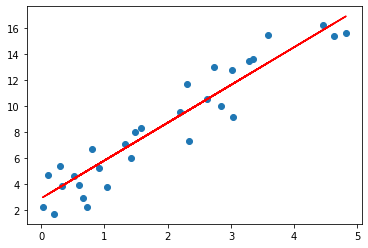

In [13]:

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

#  데이터의 랜덤 생성을 위한 seed를 설정합니다. 
np.random.seed(0)

# 1. 데이터 x와 y를 생성하는 함수와 선형 회귀를 반환하는 함수를 살펴봅니다. 
def load_data():
    X = 5*np.random.rand(100,1)
    y = 3*X + 5*np.random.rand(100,1)
    
    # 학습용 데이터와 테스트용 데이터를 분리합니다. 
    train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.3, random_state=0)
    
    return train_X, train_y, test_X, test_y

def Linear_Regression(train_X, train_y):
    # LinearRegression 클래스를 불러와서 회귀 모델을 만들어 봅니다.
    lr = LinearRegression()

    # 회귀 모델을 데이터 학습용 데이터에 맞추어 학습시킵니다.
    lr.fit(train_X,train_y)
    
    return lr
    
# 2. 단순 오차 제곱합인 RSS(Residual Sum of Squares)를 계산하여 반환하는 함수를 완성합니다
def return_RSS(test_y, predicted):
    
    RSS = sum((np.array(test_y) - np.array(predicted))**2)
    
    return RSS
    
## 그래프로 나타내어 봅니다.
def plotting_graph(test_X, test_y, predicted):
    plt.scatter(test_X,test_y)
    plt.plot(test_X, predicted, color='r')
    
    #plt.savefig("result.png")


# 3. 정의한 함수들을 이용하여 main() 함수를 완성하세요.
def main():
    # 생성한 데이터를 학습용 데이터와 테스트 데이터를 분리하여 반환하는 함수를 호출합니다.
    train_X, train_y, test_X, test_y = load_data()
    
    # 학습용 데이터를 바탕으로 학습한 선형 회귀를 저장합니다. 
    lr = Linear_Regression(train_X, train_y)
    
    # 학습된 모델을 바탕으로, 테스트 데이터 x의 회귀 결과를 출력합니다.
    predicted = lr.predict(test_X)
    
    # 모델의 예측 결과 즉, 회귀 알고리즘을 평가하기 위한 RSS 값을 저장합니다. 
    # 정의한 함수를 이용해보세요.
    RSS = return_RSS(test_y, predicted)
    print("> RSS :",RSS)
    
    plotting_graph(test_X, test_y, predicted)

if __name__=="__main__":
    main()

# 회귀 알고리즘 평가지표 - MSE, MAE

> MSE : 2.0890663766577946
> MAE : 1.220841984510205


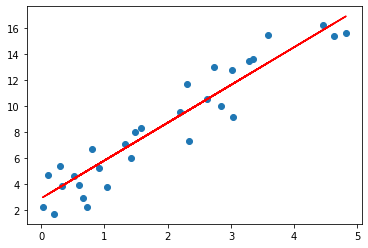

In [15]:
import matplotlib.pyplot as plt


from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

#  데이터의 랜덤 생성을 위한 seed를 설정합니다. 
np.random.seed(0)

# 1. 데이터 x와 y를 생성하는 함수와 선형 회귀를 반환하는 함수를 살펴봅니다. 
def load_data():
    X = 5*np.random.rand(100,1)
    y = 3*X + 5*np.random.rand(100,1)
    
    # 학습용 데이터와 테스트용 데이터를 분리합니다. 
    train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.3, random_state=0)
    
    return train_X, train_y, test_X, test_y

def Linear_Regression(train_X, train_y):
    # LinearRegression 클래스를 불러와서 회귀 모델을 만들어 봅니다.
    lr = LinearRegression()

    # 회귀 모델을 데이터 학습용 데이터에 맞추어 학습시킵니다.
    lr.fit(train_X,train_y)
    
    return lr
    
## 그래프로 나타내어 봅니다.
def plotting_graph(test_X, test_y, predicted):
    plt.scatter(test_X,test_y)
    plt.plot(test_X, predicted, color='r')
    

# 2. 정의한 함수들을 이용하여 main() 함수를 완성하세요.
def main():
    # 생성한 데이터를 학습용 데이터와 테스트 데이터를 분리하여 반환하는 함수를 호출합니다.
    train_X, train_y, test_X, test_y = load_data()
    
    # 학습용 데이터를 바탕으로 학습한 선형 회귀를 저장합니다. 
    lr = Linear_Regression(train_X, train_y)
    
    # 학습된 모델을 바탕으로, 테스트 데이터 x의 회귀 결과를 출력합니다.
    predicted = lr.predict(test_X)
    
    # 모델의 예측 결과 즉, 회귀 알고리즘을 평가하기 위한 MSE, MAE 값을 저장합니다.
    MAE = mean_absolute_error(test_y, predicted) 
    MSE = mean_squared_error(test_y, predicted)
    
    print("> MSE :",MSE)
    print("> MAE :",MAE)
    
    plotting_graph(test_X, test_y, predicted)
    
    return MSE, MAE

if __name__=="__main__":
    main()

# 회귀 알고리즘 평가 지표- $R^2$

> R_squared : 0.8948735905242707


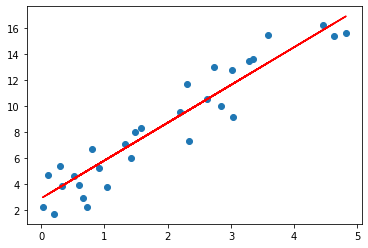

In [16]:

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#  데이터의 랜덤 생성을 위한 seed를 설정합니다. 
np.random.seed(0)

# 1. 데이터 x와 y를 생성하는 함수와 선형 회귀를 반환하는 함수를 살펴봅니다. 
def load_data():
    X = 5*np.random.rand(100,1)
    y = 3*X + 5*np.random.rand(100,1)
    
    # 학습용 데이터와 테스트용 데이터를 분리합니다. 
    train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.3, random_state=0)
    
    return train_X, train_y, test_X, test_y

def Linear_Regression(train_X, train_y):
    # LinearRegression 클래스를 불러와서 회귀 모델을 만들어 봅니다.
    lr = LinearRegression()

    # 회귀 모델을 데이터 학습용 데이터에 맞추어 학습시킵니다.
    lr.fit(train_X,train_y)
    
    return lr
    
## 그래프로 나타내어 봅니다.
def plotting_graph(test_X, test_y, predicted):
    plt.scatter(test_X,test_y)
    plt.plot(test_X, predicted, color='r')
    

# 2. 정의한 함수들을 이용하여 main() 함수를 완성하세요.
def main():
    # 생성한 데이터를 학습용 데이터와 테스트 데이터를 분리하여 반환하는 함수를 호출합니다.
    train_X, train_y, test_X, test_y = load_data()
    
    # 학습용 데이터를 바탕으로 학습한 선형 회귀를 저장합니다. 
    lr = Linear_Regression(train_X, train_y)
    
    # 학습된 모델을 바탕으로, 테스트 데이터 x의 회귀 결과를 출력합니다.
    predicted = lr.predict(test_X)
    
    # 모델의 예측 결과 즉, 회귀 알고리즘을 평가하기 위한 R_squared 값을 저장합니다.
    R_squared  = r2_score(test_y, predicted)
    
    print("> R_squared :",R_squared)
    
    plotting_graph(test_X, test_y, predicted)
    
    return R_squared

if __name__=="__main__":
    main()

# 당뇨 진행상황을 선형 회귀로 예측해보기

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.use("Agg")

import sklearn.datasets as ds
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import normalize
# from sklearn.metrics import meam_squared_error as mse

## 당뇨병 관련 데이터셋을 불러옵니다.
train_data = ds.load_diabetes()

## 불러온 데이터셋에서 입력값(input)과 결과값(label)값을 불러오고 각각 변수에 저장합니다.
    ## 입력값(input)은 sklearn.preprocessing.normalize를 사용해서 값을 Normalize 합니다.
_input, _label = [normalize(train_data['data']), train_data['target']]

#1.불러온 입력값과 결과값을 train 데이터와 test 데이터로 나눕니다.(train - 80% / test - 20%)
input_train, input_test, label_train, label_test = train_test_split(_input, _label, test_size=0.2)

#선형회귀(LinearRegression) 모델을 불러옵니다.
linear_model = LinearRegression()

#2.선형회귀 모델을 데이터(input_train, label_train)에 대하여 학습시킵니다.
linear_model.fit(input_train, label_train)

#3.테스트 입력데이터(input_test)에 대해서 학습 모델의 예측을 실행합니다.
pred = linear_model.predict(input_test)

#4.실제값(label)과 예측값(pred) 간의 오차(평균제곱오차)를 출력하는 함수를 정의하고 출력합니다.
def get_mse(label,pred):
    error= sum((np.array(pred)-np.array(label_test))**2)
    return error 

print('MSE(평균제곱오차): ', get_mse(label_test, pred)) 

MSE(평균제곱오차):  275872.92434882297


# 로지스틱 회귀

In [22]:
from data_plot import *   

import numpy as np
from sklearn.linear_model import LogisticRegression

np.random.seed(0)

def main():
    # 데이터 준비하기
    X = np.random.normal(size = 100)
    y = (X > 0).astype(np.float)
    X[X > 0] *= 5
    X += .7 * np.random.normal(size = 100)
    X = X[:, np.newaxis]


    # 1. 로지스틱 회귀 모델을 호출해 봅시다.
    logistic_model = LogisticRegression()
    
    
    # 2. 전체 X 데이터에 로지스틱 회귀 모델을 학습시킵니다.
    logistic_model.fit(X, y)
    
    
    # 실제 학습된 로지스틱 회귀 모델 결과 시각화하기
    plot_logistic_regression(logistic_model, X, y)
    
    return logistic_model

if __name__ == "__main__":
    main()


ModuleNotFoundError: No module named 'data_plot'

# SVM

In [23]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split  
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix 

def main():
    # 1. Data를 불러오세요
    data = pd.read_csv('data/dataset.csv')
    
    #2. data.head() 함수를 활용하여 Data의 첫 5개의 값을 출력해 보세요
    print(data.head(5))
    
    # SVM 수행
    test_y, pred_y = SVM(data)
    
    # 값 출력
    print("\nConfusion matrix : \n",confusion_matrix(test_y,pred_y))  
    print("\nReport : \n",classification_report(test_y,pred_y)) 

# 3. 함수 SVM() 을 완성하세요.
def SVM(data):
    # Data를 X와 y로 나누어줍니다.
    X = data.drop('Class', axis=1)  
    y = data['Class'] 
    
    # Training/test data set 분류
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 0)
    
    # 3-1. SVM 모델을 정의하고, 학습용 데이터에 맞추어 학습을 진행합니다.
    svm = SVC()
    svm.fit(train_X, train_y)
    
    
    # 3-2. 학습된 모델을 사용하여 test_X에 대한 예측값을 저장합니다.
    pred_y = svm.predict(test_X)
    
    return test_y, pred_y

if __name__ == "__main__":
    main()



   Factor01  Factor2  Factor3  Factor4  Class
0   4.67650  -3.3895  3.48960  1.47710      0
1   2.67190   3.0646  0.37158  0.58619      0
2   0.80355   2.8473  4.34390  0.60170      0
3   1.44790  -4.8794  8.34280 -2.10860      0
4   5.24230  11.0272 -4.35300 -4.10130      0

Confusion matrix : 
 [[157   0]
 [  0 118]]

Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00       118

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



# 베이즈 정리로 나이브 베이즈 분류 구현하기
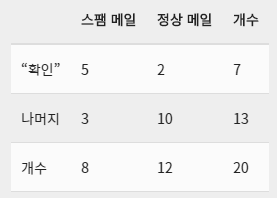

In [25]:
import numpy as np

def bayes_theorem():
    # 1. P(“스팸 메일”) 의 확률을 구하세요.
    p_spam = 8 / 20

    # 2. P(“확인” | “스팸 메일”) 의 확률을 구하세요.
    p_confirm_spam = 5 / 8
    
    # 3. P(“정상 메일”) 의 확률을 구하세요.
    p_ham = 12 / 20
    
    # 4. P(“확인” | "정상 메일" ) 의 확률을 구하세요.
    p_confirm_ham = 2 / 12
    
    # 5. P( "스팸 메일" | "확인" ) 의 확률을 구하세요.
    # P( "스팸 메일" | "확인" ) = P("스팸 메일") * P("확인" | "스팸 메일") / P("확인")
    p_spam_confirm = p_spam * p_confirm_spam / (7 / 20)
    
    # 6. P( "정상 메일" | "확인" ) 의 확률을 구하세요.
    # P( "정상 메일" | "확인" ) = P("정상 메일") * P("확인" | "정상 메일") / P("확인")
    p_ham_confirm = p_ham * p_confirm_ham / (7 / 20 )
    
    return p_spam_confirm, p_ham_confirm


# 확률값들을 정규화 합니다.
def normalization(x):
    return [element / sum(x) for element in x]

def main():
    
    p_spam_confirm, p_ham_confirm = bayes_theorem()
    
    print("P(spam|confirm) = ",p_spam_confirm, "\nP(ham|confirm) = ",p_ham_confirm, "\n")
        
    # 두 값을 비교하여 확인 키워드가 스팸에 가까운지 정상 메일에 가까운지 확인합니다.
    value = [p_spam_confirm, p_ham_confirm]
    result = normalization(value)
    
    print("P(spam|confirm) normalization = ",result[0], "\nP(ham|confirm) normalization = ",result[1], "\n")
    
    if p_spam_confirm > p_ham_confirm:
        print( round(result[0] * 100, 2), "% 의 확률로 스팸 메일에 가깝습니다.")
    else :
        print( round(result[1] * 100, 2), "% 의 확률로 일반 메일에 가깝습니다.")


if __name__ == "__main__":
    main()


P(spam|confirm) =  0.7142857142857143 
P(ham|confirm) =  0.2857142857142857 

P(spam|confirm) normalization =  0.7142857142857143 
P(ham|confirm) normalization =  0.2857142857142857 

71.43 % 의 확률로 스팸 메일에 가깝습니다.


# Scikit-learn 을 활용한 나이브 베이즈 분류

In [26]:

import pandas as pd

from sklearn.datasets import load_wine

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


def main():
    # 1. Wine 데이터를 불러옵니다.
    X, y = load_wine(return_X_y = True)
    
    # 데이터 셋을 출력을 통해 확인합니다.
    print("연속적인 값을 가진 데이터 셋 확인해보기 :", X[:1])
    
    # 불러온 데이터를 학습용, 테스트 데이터로 분리합니다.
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2,random_state=0)  
    
    # 2. 가우시안 나이브 베이즈 모델을 정의하고,
    #    학습용 데이터에 대한 모델 학습을 진행합니다.
    model = GaussianNB()
    model.fit(train_X, train_y)

    # 3. 테스트 데이터에 대한 모델 예측을 수행합니다.
    predicted = model.predict(test_X)

    ## 모델 정확도를 통해 분류 성능을 확인해봅니다.
    print("\nModel Accuracy : ")
    print(accuracy_score(test_y, predicted)) 
    
    return model, predicted


if __name__ == "__main__":
    main()


연속적인 값을 가진 데이터 셋 확인해보기 : [[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]]

Model Accuracy : 
0.9166666666666666


# 분류(Classification) 평가 지표
혼동 행렬(Confusion matrix)

Confusion matrix :
 [[15  0  1]
 [ 0 17  4]
 [ 0  3  5]]
Normalized confusion matrix :
 [[0.94 0.   0.06]
 [0.   0.81 0.19]
 [0.   0.38 0.62]]


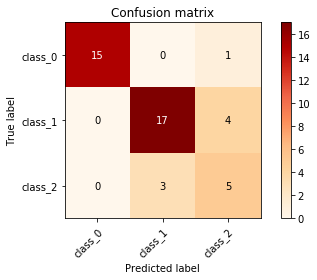

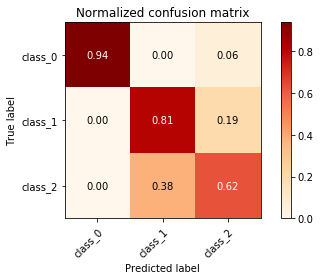

In [27]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# Confusion matrix 시각화 함수
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, cmap=plt.cm.OrRd):
                          
    title = ""
    if normalize:
        title = 'Normalized confusion matrix'
    else:
        title = 'Confusion matrix'

    ## 1. Confusion matrix에 실제 값과 예측 값을 인자로 입력하세요.
    cm = confusion_matrix(y_true, y_pred)

    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        # 정규화 할 때는 모든 값을 더해서 합이 1이 되도록 각 데이터를 스케일링 합니다.
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    print(title, ":\n", cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # label을 45도 회전해서 보여주도록 변경
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # confusion matrix 실제 값 뿌리기
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()


def main():
    # Wine data set을 불러와서 X, y 데이터에 할당합니다.
    wine = datasets.load_wine()
    X = wine.data
    y = wine.target
    class_names = wine.target_names

    # Training set과 test set으로 분리합니다.
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

    # SVM 모델로 분류기를 생성하고 학습합니다.
    classifier = svm.SVC()
    y_pred = classifier.fit(X_train, y_train).predict(X_test)
    
    np.set_printoptions(precision=2)

    # confusion matrix를 시각화하여 출력합니다.
    ## 1. plot_confusion_matrix 함수의 인자를 참고하여 None을 채워보세요.
    plot_confusion_matrix(y_test, y_pred, classes=class_names)

    # 정규화 된 confusion matrix를 시각화하여 출력합니다.
    ## 2. plot_confusion_matrix 함수의 인자를 참고하여 None을 채워보세요.
    plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True)


if __name__ == "__main__":
    main()


# 분류(Classification) 평가 지표

정확도(accuracy), 정밀도(precision), 재현율(recall)

In [28]:

import pandas as pd

def main():
    # 실제 값
    y_true = pd.Series(
        ["not mafia", "not mafia", "mafia", "not mafia", "mafia", 
        "not mafia", "not mafia", "mafia", "not mafia", "not mafia"]
        )
    # 예측된 값
    y_pred = pd.Series(
        ["mafia", "mafia", "not mafia", "not mafia", "mafia", 
        "not mafia", "not mafia", "mafia", "not mafia", "not mafia"]
        )
    
    print("Confusion Matrix :\n",pd.crosstab(y_pred, y_true, rownames=['Predicted'], colnames=['Actual'], margins=True))
    
    
    # 1. '실행 버튼을 클릭 해, 마피아(mafia)와 시민(not mafia)으로 분류 된 confusion matrix를 확인 해 보세요.
    
    
    # 2. 실행시킨 값을 토대로 마피아를 제대로 분석했는 지에 대한 recall, precision, accuracy를 구해 보세요.
    # 숫자 0을 지우고 직접 공식에 대입해 각각 값을 입력해 보세요.
    accuracy = 7 / 10
    
    precision = 2 / 4
    
    recall = 2 / 3
    
    
    return accuracy, precision, recall
    
if __name__ == "__main__":
    main()

Confusion Matrix :
 Actual     mafia  not mafia  All
Predicted                       
mafia          2          2    4
not mafia      1          5    6
All            3          7   10


# 분류(Classification) 평가 지표

AUC - ROC Curve

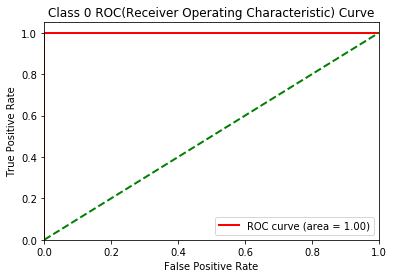

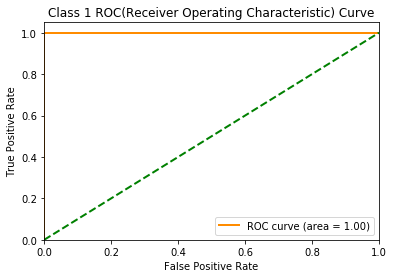

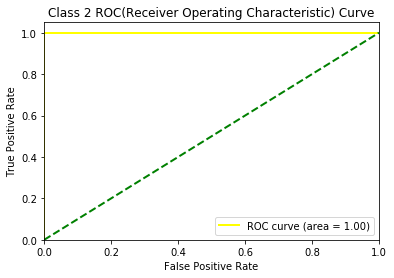

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp


def main():
    # 와인 데이터를 불러옵니다.
    wine = datasets.load_wine()
    # X와 Y 데이터를 나눕니다.
    X = wine.data
    y = wine.target

    # class를 숫자로 변환시켜줍니다.
    y = label_binarize(y, classes=[0, 1, 2])
    
    ## 1. y에 해당하는 클래스가 몇 개인지 확인해보세요.
    n_classes = y.shape[1]

    # 약간의 noise를 넣어서 문제를 좀 더 변동성 있게 만듭니다.
    random_state = np.random.RandomState(0)
    n_samples, n_features = X.shape
    X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

    # Training / test data를 나눠줍니다.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0)

    # SVM을 활용하여 모델링 및 학습을 진행 합니다.
    random_state = np.random.RandomState(0)
    classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True, random_state=random_state))
    y_score = classifier.fit(X_train, y_train).decision_function(X_test)
    
    # 2. calculate_roc 함수를 통해 각각 클래스의 fpr, tpr, roc_auc 값을 계산합니다.
    fpr, tpr, roc_auc = calculate_roc(y_test, y_score, n_classes)
    
    for nth_class in range(n_classes):
        plot_ROC_curve(fpr, tpr, roc_auc, nth_class)
    
    return fpr, tpr, roc_auc

# 2. calculate_roc() 함수를 완성합니다.
def calculate_roc(y_test, y_score, n_classes):
    # 각 클래스의 ROC Curve 값을 계산하여 넣어 줄 변수를 선언합니다.
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # ROC curve를 사용하여 분류 성능을 확인해 봅시다.
    for i in range(n_classes):
        ## 2. roc_curve() 함수에 y_test의 i번째 열, y_score의 i번째 열을 입력 인자로 넣어 fpr[i], tpr[i]의 값을 획득하세요.
        fpr[i], tpr[i], _ = roc_curve(y_test[i], y_score[i])

        ## 3. auc() 함수에 fpr[i], tpr[i]를 입력 인자로 넣어 각각의 클래스에서의 ROC & AUC 값을 획득하세요.
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    return fpr, tpr, roc_auc


# ROC curve를 그리기 위해 사용되는 함수입니다.
def plot_ROC_curve(fpr, tpr, roc_auc, nth_class):

    plt.figure()
    lw = 2
    
    color_name = ''
    if nth_class == 0:
        color_name = 'red'
    elif nth_class == 1 :
        color_name = 'darkorange'
    else :
        color_name = 'yellow'
        
    plt.plot(fpr[nth_class], tpr[nth_class], color=color_name,
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[nth_class])
    plt.plot([0, 1], [0, 1], color='green', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Class %s ROC(Receiver Operating Characteristic) Curve' %nth_class)
    plt.legend(loc="lower right")

if __name__ == "__main__":
    main()

# Confusion matrix를 통한 문자 인식률 확인하기 (아직)

다중 클래스 분석

In [ ]:
from elice_utils import EliceUtils
elice_utils = EliceUtils()
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from random import randint


def main():
	# digit data set을 불러옵니다.
    digits = datasets.load_digits()
    
    # digit data set의 모양을 변경시켜줍니다.
    n_samples = len(digits.images)
    data = digits.images.reshape((n_samples, -1))

    # SVM Classifier를 사용합니다.
    classifier = svm.SVC(gamma=0.001)

    # 1. n_samples 를 이용하여 digits.data 의 절반을 학습시킵니다.
    classifier.fit(data[:int(n_samples/2)], ????????)

    # 2. 나머지 절반을 test data set으로 두고 모델에 넣어서 y값을 예측시킵니다.
    expected = data[int(n_samples/2):]
    predicted = classifier.predict(expected)
    
    # 학습된 모델로 digit data가 제대로 예측 됐는 지 confusion matrix를 호출합니다.
    print("Confusion matrix results :\n\t- row : real(expected) 0 ~ 9 label\n\t- column : predicted 0 ~ 9 label\n\n%s\n" 
            % metrics.confusion_matrix(expected, predicted))
           
    # 3. Confusion matrix 3번째 index 의 precision을 구해보세요!
    index_3_precision = 0
    
    # 4. Confusion matrix 3번째 index 의 recall을 구해보세요!
    index_3_recall = 0
    
    # 랜덤으로 뽑은 4개의 데이터를 학습된 모델로 제대로 예측 했는 지 시각화 합니다.
    draw_digit_images(digits, n_samples, predicted)
    
    
    return index_3_precision, index_3_recall
    


## 이미지 출력을 담당하는 부분입니다.
def draw_digit_images(digits, n_samples, predicted):
    number = randint(0, n_samples // 2 - 4)

    images_and_labels = list(zip(digits.images[n_samples // 2:], 
        digits.target[n_samples // 2:]))
    
    for index, (image, label) in enumerate(images_and_labels[number: number + 4]):
        plt.subplot(2, 4, index + 1)
        plt.axis('off')
        plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title('Training: %i' % label)

    images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
    for index, (image, prediction) in enumerate(images_and_predictions[number: number + 4]):
        plt.subplot(2, 4, index + 5)
        plt.axis('off')
        plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title('Prediction: %i' % prediction)

    plt.savefig('digit.png')
    elice_utils.send_image('digit.png')

if __name__ == "__main__":
    main()


# k-means 클러스터링

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal length (cm), dtype: int64


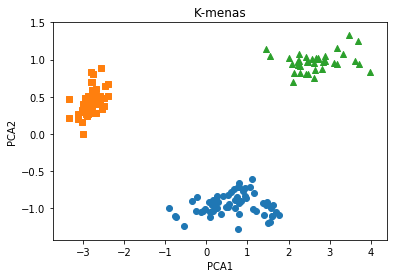

In [30]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def main():
    # Iris 데이터 불러오기
    iris = load_iris()
    
    # Iris 데이터 프레임 만들기
    irisDF = pd.DataFrame(data = iris.data, columns = iris.feature_names)
    
    # 1.KMeans 객체 불러오고, 클러스터링 진행하기
    # Iris 데이터는 3개의 클래스를 가지고 있으므로 3개의 군집으로 나누어줍니다.
    # 객체를 설정하는 동시에 fit() 함수를 이용하여 K-means 클러스터링을 수행합니다.
    kmeans = KMeans(3).fit(iris.data)
    
    # 2.군집화 결과 즉, 각 데이터가 속한 군집 중심점들의 label을 데이터 프레임에 추가합니다.
    irisDF['cluster'] = kmeans.labels_
    irisDF['target'] = iris.target
    
    # 군집화 결과를 보기 위해 groupby 함수를 사용해보겠습니다.
    # target과 cluster의 개수에 대해 sepal_length 데이터를 표현합니다.
    iris_result = irisDF.groupby(['target','cluster'])['sepal length (cm)'].count()
    print(iris_result)
    
    # 군집화 결과 시각화하기
    Visualize(irisDF)
    
    return iris_result
    
def Visualize(irisDF):
    
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(irisDF)

    irisDF['pca_x'] = pca_transformed[:,0]
    irisDF['pca_y'] = pca_transformed[:,1]


    # 군집된 값이 0, 1, 2 인 경우, 인덱스 추출
    idx_0 = irisDF[irisDF['cluster'] == 0].index
    idx_1 = irisDF[irisDF['cluster'] == 1].index
    idx_2 = irisDF[irisDF['cluster'] == 2].index
    
    # 각 군집 인덱스의 pca_x, pca_y 값 추출 및 시각화
    fig, ax = plt.subplots()
    
    ax.scatter(x=irisDF.loc[idx_0, 'pca_x'], y= irisDF.loc[idx_0, 'pca_y'], marker = 'o')
    ax.scatter(x=irisDF.loc[idx_1, 'pca_x'], y= irisDF.loc[idx_1, 'pca_y'], marker = 's')
    ax.scatter(x=irisDF.loc[idx_2, 'pca_x'], y= irisDF.loc[idx_2, 'pca_y'], marker = '^')
    ax.set_title('K-menas')
    ax.set_xlabel('PCA1')
    ax.set_ylabel('PCA2')
    

    
if __name__ == "__main__":
    main()


# Gaussian Mixture Model

target  cluster
0       0          50
1       1           5
        2          45
2       1          50
Name: sepal length (cm), dtype: int64


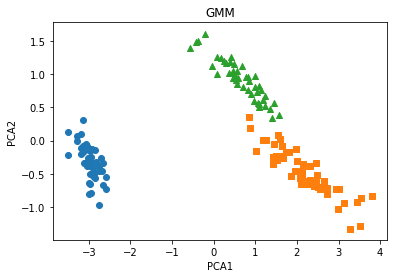

In [31]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt


def main():
    # Iris 데이터 불러오기
    iris = load_iris()
    
    # Iris 데이터 프레임 만들기
    irisDF = pd.DataFrame(data = iris.data, columns = iris.feature_names)
    
    # 1.GaussianMixture 객체 불러오고, 클러스터링 진행하기
    # Iris 데이터는 3개의 클래스를 가지고 있으므로 3개의 군집으로 나누어줍니다.
    # 객체를 설정하는 동시에 fit() 함수를 이용하여 GaussianMixture Model을 이용한 클러스터링 학습을 수행합니다.
    gmm = GaussianMixture(3).fit(iris.data)
    
    # 2. 각 데이터가 속한 군집 label을 예측하여 데이터 프레임에 추가합니다.
    irisDF['cluster'] = gmm.predict(iris.data)
    irisDF['target'] = iris.target
    
    # 군집화 결과를 보기 위해 groupby 함수를 사용해보겠습니다.
    # target과 cluster의 개수에 대해 sepal_length 데이터를 표현합니다.
    iris_result = irisDF.groupby(['target','cluster'])['sepal length (cm)'].count()
    print(iris_result)
    
    # 군집화 결과 시각화하기
    Visualize(irisDF)
    
    return iris_result
    
def Visualize(irisDF):
    
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(irisDF)

    irisDF['pca_x'] = pca_transformed[:,0]
    irisDF['pca_y'] = pca_transformed[:,1]

    # 군집된 값이 0, 1, 2 인 경우, 인덱스 추출
    idx_0 = irisDF[irisDF['cluster'] == 0].index
    idx_1 = irisDF[irisDF['cluster'] == 1].index
    idx_2 = irisDF[irisDF['cluster'] == 2].index
    
    # 각 군집 인덱스의 pca_x, pca_y 값 추출 및 시각화
    fig, ax = plt.subplots()
    
    ax.scatter(x=irisDF.loc[idx_0, 'pca_x'], y= irisDF.loc[idx_0, 'pca_y'], marker = 'o')
    ax.scatter(x=irisDF.loc[idx_1, 'pca_x'], y= irisDF.loc[idx_1, 'pca_y'], marker = 's')
    ax.scatter(x=irisDF.loc[idx_2, 'pca_x'], y= irisDF.loc[idx_2, 'pca_y'], marker = '^')
    ax.set_title('GMM')
    ax.set_xlabel('PCA1')
    ax.set_ylabel('PCA2')
    
    
if __name__ == "__main__":
    main()


# K-means VS GMM
임의의 데이터 생성

K-means Clustering
target  kmeans_label
0       0               67
        2               31
        1                2
1       1               97
        0                3
2       2               67
        0               33
Name: kmeans_label, dtype: int64
Gaussian Mixture Model
target  gmm_label
0       0            100
1       1             98
        0              2
2       2             92
        0              8
Name: gmm_label, dtype: int64


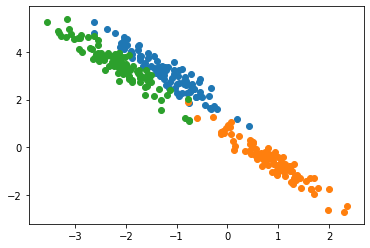

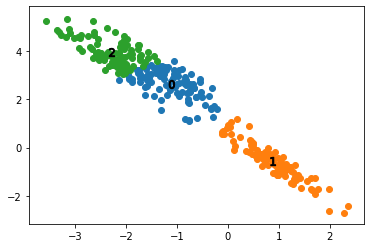

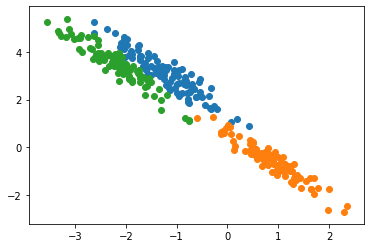

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs

# make_blobs()으로 데이터를 생성해보세요.
X, y = make_blobs(n_samples = 300, n_features =2, centers =3, cluster_std = 0.8, random_state=0)

# 데이터의 분포를 변형시키기 위해 transformation을 진행합니다.
transformation = [[0.60834549, -0.63667341],[-0.40887718,0.85253229]]
X_aniso = np.dot(X, transformation)

# 데이터 프레임 만들기 
clusterDF = pd.DataFrame(data = X_aniso, columns= ['ftr1','ftr2'])
clusterDF['target'] = y
target_list = np.unique(y)

# 생성된 데이터 시각화
def data_visualize():
    fig, ax = plt.subplots()
    for target in target_list:
        target_cluster = clusterDF[clusterDF['target'] == target]
        ax.scatter(x = target_cluster['ftr1'], y = target_cluster['ftr2'])
    
    
# K-Means Clustering
def K_means():
    # K-means
    k_means = KMeans(n_clusters = 3, random_state = 0) # KMeans clustering
    kmeans_label = k_means.fit_predict(X_aniso)         # 학습 및 예측
    clusterDF['kmeans_label']=kmeans_label             # 데이터프레임에 결과값 저장
    
    # Kmeans 군집의 중심값을 뽑아보세요.
    center = k_means.cluster_centers_                   # 군집별 중심값 추출
    
    # KMeans 군집 결과 시각화
    unique_labels = np.unique(kmeans_label)
    fig, ax = plt.subplots()
    
    for label in unique_labels:
        label_cluster = clusterDF[clusterDF['kmeans_label'] == label]
        center_x_y = center[label]
        ax.scatter(x = label_cluster['ftr1'], y = label_cluster['ftr2'])
        ax.scatter(x = center_x_y[0], y = center_x_y[1], s = 70,color = 'k', marker = '$%d$' % label)
    

    print("K-means Clustering")
    print(clusterDF.groupby('target')['kmeans_label'].value_counts())

def GMM():
    # GMM Clutering
    gmm = GaussianMixture(n_components=3, random_state=0)   # GMM 불러오기
    gmm_label = gmm.fit(X_aniso).predict(X_aniso)           # 학습과 결과 예측
    clusterDF['gmm_label']=gmm_label                        # 예측 label 데이터프레임에 입력
    unique_labels = np.unique(gmm_label)
    
    # GMM Clustering 시각화
    fig, ax = plt.subplots()
    for label in unique_labels:
        label_cluster = clusterDF[clusterDF['gmm_label'] == label]
        plt.scatter(x = label_cluster['ftr1'], y = label_cluster['ftr2'])
    
    
    print("Gaussian Mixture Model")
    print(clusterDF.groupby('target')['gmm_label'].value_counts())

def main():
    data_visualize()
    K_means()
    GMM()

if __name__ == "__main__":
    main()


# 주성분분석(PCA)

- original shape:    (178, 2)
- transformed shape: (178, 1)


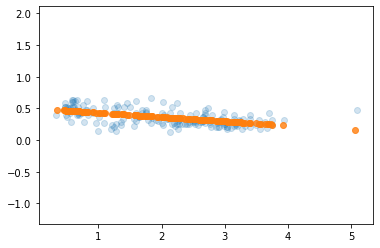

In [33]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt

def main():
    # wine data를 불러옵니다.
    wine = load_wine()
    
    # 특정 column index를 지정한 뒤 연속되는 2개의 feature를 X에 저장합니다.
    column_start = 6
    X = wine.data[:, column_start : column_start + 2]
    
    # 1. PCA의 n_components를 1로 지정하여 pca 를 정의합니다.
    pca = PCA(1)
    
    # 2. X 데이터로 모델을 학습시킵니다.
    pca.fit(X)
    
    # 3. 다시 X 데이터를 넣어 X_pca 값을 추출합니다.
    X_pca = pca.transform(X)
    
    print("- original shape:   ", X.shape)
    print("- transformed shape:", X_pca.shape)
    
    # 축소된 주성분 축과 데이터 산점도를 그려주는 부분입니다.
    X_new = pca.inverse_transform(X_pca)
    
    plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
    plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
    plt.axis('equal');

    return X_pca

if __name__ == '__main__':
    main()

# t-SNE

In [34]:
import numpy as np
from sklearn.manifold import TSNE
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt


def main():
    # wine data를 불러옵니다.
    wine = load_wine()
    
    # 특정 column index를 지정한 뒤 연속되는 2개의 feature를 X에 저장합니다.
    column_start = 6
    X = wine.data[:, column_start : column_start + 2]
    
    # 1. t-SNE의 n_components를 1로 지정합니다.
    tsne = TSNE(n_components = 1)
    
    # 2. X 데이터를 넣어 모델을 학습시키고, 차원이 축소된 X_tsne 값을 추출합니다.
    X_tsne = tsne.fit_transform(X)
    
    print("- original shape:   ", X.shape)
    print("- transformed shape:", X_tsne.shape)
    
    print("원본 데이터 X :\n", X[:5])
    print("차원 축소 이후 데이터 X_tsne\n",X_tsne[:5])
    
    return X_tsne
    
if __name__ == '__main__':
    main()

- original shape:    (178, 2)
- transformed shape: (178, 1)
원본 데이터 X :
 [[3.06 0.28]
 [2.76 0.26]
 [3.24 0.3 ]
 [3.49 0.24]
 [2.69 0.39]]
차원 축소 이후 데이터 X_tsne
 [[ 9.96]
 [ 6.53]
 [11.51]
 [12.79]
 [ 5.47]]


# 차원 축소로 성능 향상시키기 (아직)

In [ ]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

from elice_utils import EliceUtils
elice_utils = EliceUtils()

def main():
    
    # digits data를 불러옵니다.
    digits = load_digits()
    print(digits)
    
    # 1. digits.data.shape와 digits.image.shape를 출력해보고 차이를 확인하세요.  
    print("\nImage shape : \n", digits.data.shape)
    print("\nData shape : \n", digits.images.shape)
    
    # 2. digits.target.shape와 digits.target_names를 출력하여 차이를 확인하세요.
    print("\nTarget shape : \n", digits.target.shape)
    print("\nTarget names : \n", digits.target_names)

    row = digits.images.shape[1]
    col = digits.images.shape[2]
    
    
    # digit 이미지를 시각화합니다.
    plt.figure(figsize=(20,4));
    n_data = 100

    # Original Image (64 components)
    plt.subplot(1, 5, 1);
    plt.imshow(digits.data[n_data].reshape(row, col),
                  cmap = plt.cm.gray, interpolation='nearest')
    plt.xlabel('64 Components', fontsize = 12)
    plt.title('Original Image', fontsize = 14)
    

    # 아래 선언 된 train_PCA_and_restore_image() 함수의 인자를 채워보세요.
    # 3. 32 principal components 를 가지고 이미지를 축소시킵니다.
    plt.subplot(1, 5, 2);
    reduced_image_32, score_32 = train_PCA_and_restore_image(32, digits.images)
    plt.imshow(reduced_image_32[n_data].reshape(row, col),
                  cmap = plt.cm.gray, interpolation='nearest')
    plt.xlabel('32 Components', fontsize = 12)
    

    # 아래 선언 된 train_PCA_and_restore_image() 함수의 인자를 채워보세요.
    # 4. 16 principal components 를 가지고 이미지를 축소시킵니다.
    plt.subplot(1, 5, 3);
    reduced_image_16, score_16 = train_PCA_and_restore_image(16, digits.images)
    plt.imshow(reduced_image_16[n_data].reshape(row, col),
                  cmap = plt.cm.gray, interpolation='nearest')
    plt.xlabel('16 Components', fontsize = 12)
    

    # 아래 선언 된 train_PCA_and_restore_image() 함수의 인자를 채워보세요.
    # 5. 8 principal components 를 가지고 이미지를 축소시킵니다.
    plt.subplot(1, 5, 4);
    reduced_image_8, score_8 = train_PCA_and_restore_image(8, digits.images)
    plt.imshow(reduced_image_8[n_data].reshape(row, col),
                  cmap = plt.cm.gray, interpolation='nearest')
    plt.xlabel('8 Components', fontsize = 12)
    

    # 아래 선언 된 train_PCA_and_restore_image() 함수의 인자를 채워보세요.
    # 6. 4 principal components 를 가지고 이미지를 축소시킵니다.
    plt.subplot(1, 5, 5);
    reduced_image_4, score_4 = train_PCA_and_restore_image(4, digits.images)
    plt.imshow(reduced_image_4[n_data].reshape(row, col),
                  cmap = plt.cm.gray, interpolation='nearest')
    plt.xlabel('4 Components', fontsize = 12)
    
    plt.savefig('PCA.png')
    elice_utils.send_image('PCA.png')
    
    return score_32, score_16, score_8, score_4
    
    
# 줄일 숫자와 이미지를 인자로 넣어 이미지를 줄인 feature로 복원합니다.
def train_PCA_and_restore_image(dim_reduction_number, images): 
    
    # PCA 모델을 생성합니다.
    pca = PCA(n_components = dim_reduction_number)
    
    # 받은 이미지로 모델을 학습하고, pca의 주성분을 가려냅니다.
    pca.fit(images)
    
    # 원본 이미지의 feature를 축소시킨 주성분 feature로 변환합니다.
    components = pca.transform(images)
    
    # 축소된 주성분 feature를 다시 복원하여 이미지로 만듭니다.
    approxOriginal = pca.inverse_transform(components)
    
    # 축소된 이미지의 log-likelihood를 통해 점수를 확인합니다. (값이 높을수록 좋습니다.)
    score = pca.score(approxOriginal)
    
    return approxOriginal, score


if __name__ == '__main__':
    main()

# 간단한 이진트리 분류기 만들기
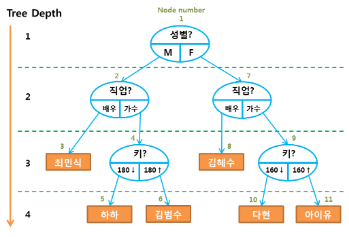

In [35]:
import numpy as np
import pandas as pd


# 직업, 키, 성별로 이름을 구분하는 간단한 이진트리 분류기를 만들어보겠습니다.
name = ['하하', '김범수', '다현', '아이유', '최민식', '김혜수']
job  = ['가수', '가수'  , '가수', '가수'  , '배우'  , '배우']
height = [171, 182, 158, 160, 177, 170]
sex = ['M', 'M', 'F', 'F', 'M', 'F']

# Node 번호를 지정해주기 위한 변수
num = 0

# Node 정보를 저장하기 위한 딕셔너리 생성
node_list = {}

# 데이터 프레임 만들기
data = pd.DataFrame({'이름': name, '직업': job, '키': height,'성별': sex})
print(data,'\n')

# 키 분류 Node
def Height_Node(df, idx, depth):
    # 전역 변수를 함수 내에서 사용하기 위해 Global 선언
    global num
    global node_list
    num +=1
    # Node num, Depth, Node Name 출력
    print('Node_num : {} | Node Depth : {} | Height_Node'.format(num, depth))
    node_list[num] = 'Height_Node'
    
    for i in idx:
        num +=1
        # 성별에 따라 키의 기준이 다르기 때문에 성별을 우선 분류
        if df['성별'][i] == 'M':
            # 남자의 경우 키에 따라 분류
            # 키가 180보다 작은 경우
            if df['키'][i] <= 180:
                print('Node_num : {} | Node Depth : {} | Name : {}'.format( num, depth, df['이름'][i]))
                node_list[num] = data['이름'][i]
            # 키가 180보다 큰 경우
            else:
                print('Node_num : {} | Node Depth : {} | Name : {}'.format(num, depth, df['이름'][i]))
                node_list[num] = data['이름'][i]
        else:
            # 여자의 경우 키에 따라 분류
            # 키가 160보다 작은 경우
            if df['키'][i] <= 160 :
                print('Node_num : {} | Node Depth : {} | Name : {}'.format( num, depth, df['이름'][i]))
                node_list[num] = data['이름'][i]
            # 키가 160보다 큰 경우
            else:
                print('Node_num : {} | Node Depth : {} | Name : {}'.format( num, depth, df['이름'][i]))
                node_list[num] = data['이름'][i]

# 직업 분류 Node
def Job_Node(df,idx, depth):
    # 전역 변수를 함수 내에서 사용하기 위해 Global 선언
    global num
    global node_list
    num +=1
    
    # Node num, Depth, Node Name 출력
    print('Node_num : {} | Node Depth : {} | Job_Node'.format(num, depth))
    node_list[num] = 'Job_Node'
    
    # Index 저장을 위한 리스트 
    singer = []
    
    for i in idx:
        # 가수인 경우 Index 저장
        if job[i] == '가수':
            singer.append(i)
            
        # 배우인 경우 Node 번호와 해당 배우의 이름 출력    
        else:
            num += 1
            print('Node_num : {} | Node Depth : {} | Name : {}'.format( num, depth, df['이름'][i]))
            node_list[num] = data['이름'][i]
    
    # 가수인 경우 분류가 끝나지 않았으므로 Index 출력
    print('가수 Index : ',singer)
    
    # 마지막 분류 기준인 키를 통해 가수를 분류
    # 다음 Node를 호출할 때 depth를 하나 증가시켜줍니다.
    Height_Node(df, singer, depth + 1)
    

# 성별 분류 Node
def Sex_Node(df, depth):
    # 전역 변수를 함수 내에서 사용하기 위해 Global 선언
    global num
    global node_list
    # Node num, Depth, Node Name 출력
    num +=1
    print('Node_num : {} | Node Depth : {} | Sex_Node'.format(num, depth))
    node_list[num] = 'Sex_Node'
    
    male = []
    female = []
    # 처음 성별 데이터 전체로 분류
    for idx, sex in enumerate(df['성별']):
        # 남자인 경우 Index 저장
        if sex == 'M':
            male.append(idx)
        # 여자인 경우 Index 저장
        elif sex == 'F':
            female.append(idx)
            
    
    # Index 확인
    print('남자 Index : ',male)
    print('여자 Index : ',female)
    
    # 성별 분류 후 직업을 분류하는 Node를 호출합니다.
    # 다음 Node를 호출할 때 depth를 하나 증가시켜줍니다.
    Job_Node(data, male, depth + 1)
    Job_Node(data, female, depth + 1)
    

# 첫 번째 분류 기준으로 성별을 설정합니다.
Sex_Node(data, 1)
print(node_list)


    이름  직업    키 성별
0   하하  가수  171  M
1  김범수  가수  182  M
2   다현  가수  158  F
3  아이유  가수  160  F
4  최민식  배우  177  M
5  김혜수  배우  170  F 

Node_num : 1 | Node Depth : 1 | Sex_Node
남자 Index :  [0, 1, 4]
여자 Index :  [2, 3, 5]
Node_num : 2 | Node Depth : 2 | Job_Node
Node_num : 3 | Node Depth : 2 | Name : 최민식
가수 Index :  [0, 1]
Node_num : 4 | Node Depth : 3 | Height_Node
Node_num : 5 | Node Depth : 3 | Name : 하하
Node_num : 6 | Node Depth : 3 | Name : 김범수
Node_num : 7 | Node Depth : 2 | Job_Node
Node_num : 8 | Node Depth : 2 | Name : 김혜수
가수 Index :  [2, 3]
Node_num : 9 | Node Depth : 3 | Height_Node
Node_num : 10 | Node Depth : 3 | Name : 다현
Node_num : 11 | Node Depth : 3 | Name : 아이유
{1: 'Sex_Node', 2: 'Job_Node', 3: '최민식', 4: 'Height_Node', 5: '하하', 6: '김범수', 7: 'Job_Node', 8: '김혜수', 9: 'Height_Node', 10: '다현', 11: '아이유'}


# 의사 결정나무(DecisionTree Regressor) - 회귀

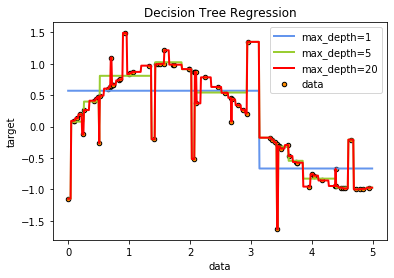

In [36]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

def main():
    # 랜덤 데이터 셋을 생성합니다.
    rng = np.random.RandomState(1)
    X = np.sort(5 * rng.rand(80, 1), axis=0)
    y = np.sin(X).ravel()
    y[::5] += 3 * (0.5 - rng.rand(16))

    # 1. 의사결정 나무 모델을 정의하고, 데이터에 맞추어 학습시킵니다.
    # max_depth 가 1인 의사결정 나무 회귀 모델을 정의하고, 학습시킵니다.
    regr_1 = DecisionTreeRegressor(max_depth = 1)
    regr_1.fit(X, y)
    
    # max_depth 가 5인 의사결정 나무 회귀 모델을 정의하고, 학습시킵니다.
    regr_5 = DecisionTreeRegressor(max_depth = 5)
    regr_5.fit(X, y)
    
    # max_depth 가 20인 의사결정 나무 회귀 모델을 정의하고, 학습시킵니다.
    regr_20 = DecisionTreeRegressor(max_depth = 20)
    regr_20.fit(X, y)
    
    # 테스트용 데이터를 생성하고, 학습한 모델을 이용하여 예측을 수행합니다.
    X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
    
    y_1 = regr_1.predict(X_test)
    y_5 = regr_5.predict(X_test)
    y_20 = regr_20.predict(X_test)
    
    
    # 그래프로 시각화합니다.
    plt.figure()
    plt.scatter(X, y, s=20, edgecolor="black",
                c="darkorange", label="data")
    plt.plot(X_test, y_1, color="cornflowerblue",
             label="max_depth=1", linewidth=2)
    plt.plot(X_test, y_5, color="yellowgreen", label="max_depth=5", linewidth=2)
    plt.plot(X_test, y_20, color="red", label="max_depth=20", linewidth=2)
    plt.xlabel("data")
    plt.ylabel("target")
    plt.title("Decision Tree Regression")
    plt.legend()
    
    
    return y_1, y_5, y_20

if __name__ == "__main__":
    main()


# 의사결정 나무(DecisionTree Classifier) - 분류

In [37]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def main():
    # Iris 데이터를 불러옵니다.
    iris = load_iris()
    
    # 불러온 데이터를 학습용 데이터와 테스트 데이터로 분리합니다.
    train_X, test_X, train_y, test_y = train_test_split(iris.data, iris.target, random_state = 100)
    
    # 1. 분류를 위한 의사 결정 나무 모델을 불러와 저장합니다.
    dtree = DecisionTreeClassifier()
    
    # 2. 의사 결정 나무를 학습용 데이터에 대해 학습시킵니다.
    dtree.fit(train_X, train_y)
    
    # 3. 테스트 데이터에 대한 분류 결과를 예측합니다.
    pred = dtree.predict(test_X)
    print('테스트 데이터에 대한 예측 정확도 : {0:.4f}'.format(accuracy_score(test_y, pred)))
    
    return pred
    
if __name__ == "__main__":
    main()


테스트 데이터에 대한 예측 정확도 : 0.9474


# 앙상블 기법 - voting

In [38]:
import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 분류 문제를 위한 유방암 데이터 불러오기
cancer = load_breast_cancer()

# 불러온 데이터를 데이터 프레임으로 만들기
data_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)

# 1. Voting과 비교할 각각 다른 분류 모델 불러오기
#    (LogisticRegression, KNeighborsClassifier)
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier()

# 2. Voting에 사용할 분류 모델 정의하기
# Voting을 위해 LogisticRegressor와 KNeighborClassifier를 사용합니다.
# Voting 방식은 Soft Voting을 사용합니다.
vo_clf = VotingClassifier(estimators = [('LR', lr_clf),('KNN',knn_clf)],
                            voting = 'soft')

# 학습 데이터와 검증 데이터로 나누기
train_X, test_X, train_y ,test_y = train_test_split(cancer.data, cancer.target, test_size = 0.2, random_state = 156)

# 정의한 Voting Classifier에 대해 학습용 데이터에 맞춰 학습을 시킵니다.
vo_clf.fit(train_X, train_y)

# Voting 결과 예측
pred = vo_clf.predict(test_X)
print('Voting Classifier 정확도 : {0:.4f}'.format(accuracy_score(test_y, pred)))

# 다른 분류기를 각각 학습했을 때 결과 예측
# classifiers에 lr_clf, knn_clf를 넣어주세요.
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(train_X, train_y)
    pred = classifier.predict(test_X)
    class_name = classifier.__class__.__name__
    print("{0} 정확도 : {1:.4f}".format(class_name, accuracy_score(test_y, pred)))


Voting Classifier 정확도 : 0.9474
LogisticRegression 정확도 : 0.9386
KNeighborsClassifier 정확도 : 0.9035


C:\python\envs\cpu_env\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\python\envs\cpu_env\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regress

# 앙상블 기법 - 배깅

In [39]:
import pandas as pd
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 분류 문제를 위한 유방암 데이터 불러오기
cancer = load_breast_cancer()

# 불러온 데이터를 데이터 프레임으로 만들기
data_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)

# 1. BaggingClassifier 정의하기 
#    분류기로 의사결정 나무(DecisionTreeClassifier)를 사용합니다.
ba_clf = BaggingClassifier(base_estimator = DecisionTreeClassifier(),n_estimators = 1)

# 학습 데이터와 검증 데이터로 나누기
train_X, test_X, train_y ,test_y = train_test_split(cancer.data, cancer.target, test_size = 0.2, random_state = 156)

# 2. 정의한 Bagging Classifier로 훈련용 데이터에 맞추어 학습시킵니다.
ba_clf.fit(train_X, train_y)

# 3. 학습을 진행한 Bagging 결과 Classifier로 테스트 데이터에 대한 예측을 수행합니다.
pred = ba_clf.predict(test_X)
print('Voting Classifier 정확도 : {0:.4f}'.format(accuracy_score(test_y, pred)))

# 단일 의사결정 나무를 학습했을 때 결과 예측하기
single_dt = DecisionTreeClassifier()
single_dt.fit(train_X,train_y)
single_pred = single_dt.predict(test_X)
print('Single Decision Tree Classifier 정확도 : {0:.4f}'.format(accuracy_score(test_y, single_pred)))

Voting Classifier 정확도 : 0.9474
Single Decision Tree Classifier 정확도 : 0.9474


# 랜덤 포레스트

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

# 유방암 데이터 세트 불러오기
bc = load_breast_cancer()

# 학습 데이터와 테스트 데이터로 분할하기
X_train, X_test, y_train, y_test = train_test_split(bc.data, bc.target, test_size = 0.2, random_state = 121)

# 1. RandomForestClassifier 모델을 불러옵니다.
rfc = RandomForestClassifier()

# 2. 랜덤 포레스트 파라미터 목록 작성하기
param ={
    'n_estimators'      : [1],
    'max_depth'         : [1],
    'min_samples_leaf'  : [1],
    'min_samples_split' : [2]
}

# 가장 높은 예측 정확도를 도출하는 파라미터를 찾기 위한 GridSearchCV 불러오기
grid_rfc = GridSearchCV(rfc, param_grid = param)

# RandomForestClassifier를 학습 데이터에 맞추어 학습시키기
grid_rfc.fit(X_train, y_train)

# 최적의 파라미터와 최고 예측 정확도 계산
print('최적 파라미터      : ', grid_rfc.best_params_)
print('최고 예측 정확도   : {0:.4f}'.format(grid_rfc.best_score_))

# 최적의 파라미터로 학습된 트리 Estimator 가져오기
estimator = grid_rfc.best_estimator_

# 테스트 데이터로 결과 예측을 수행합니다.
pred = estimator.predict(X_test)
print('검증 데이터 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))



최적 파라미터      :  {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1}
최고 예측 정확도   : 0.8198
검증 데이터 정확도 : 0.9298


# tmp

(205,) (205,)
R2 score: 0.06217893989258383


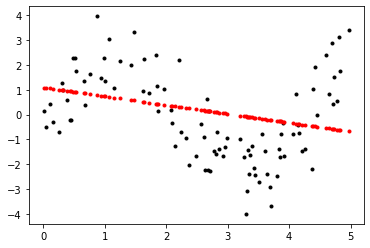

In [7]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


def sample(size):
    np.random.seed(2020)
    
    # x 값을 생성합니다.  
    x = np.linspace(0, 5, size)
    
    # y = 2 * sin(1.5x) + e 을 생성합니다.
    y = 2 * np.sin(x * 1.5) + np.random.randn(x.size)
    train_X, test_X = train_test_split(x, test_size = 95/300, random_state = 100)
    train_y, test_y = train_test_split(y, test_size = 95/300, random_state = 100)
    
    return train_X, test_X, train_y, test_y
    
    # 2.TODO:선형 회귀 모델을 설정하고 `train_X , train_y`을 학습한 모델을 출력합니다.
def fit_regression_model(train_X, train_y):
    '''
    선형 회귀 모델을 직접 만들거나 sklearn을 사용하여 모델을 가져와 `model`에 저장한 후 학습을 수행합니다.
    '''
    print(train_X.shape, train_y.shape)
    model = LinearRegression()
    model.fit(train_X.reshape(-1, 1), train_y)
    
    return model
    
    #2.TODO: 테스트용 데이터 `test_X`의 예측값을 pred_y에 저장하는 prediction 함수를 완성합니다.
def prediction(model, test_X):
    pred_y = model.predict(test_X.reshape(-1, 1))
    
    return pred_y
    
    
def plot_figure(test_X, test_y, pred_y):
    '''
    회귀 분석 결과 그래프를 그립니다.
    '''
    # 
    plt.plot(test_X, test_y, 'k.')
    plt.plot(test_X, pred_y, 'r.')

    # 구현한 코드가 동작된다고 판단되면 아래 두 줄의 주석을 풀어주세요.
    # plt.savefig('./linear_regression.png')
    # elice_utils.send_image('linear_regression.png')
    

def main():
    #1.TODO: sample 함수를 이용하여 train_x, train_y, test_x, test_y 데이터를 생성합니다.
    train_X, test_X, train_y, test_y = sample(300)
    model = fit_regression_model(train_X, train_y)
    
    #2.TODO: 테스트용 데이터 `test_X`의 예측값을 pred_y에 저장합니다.
    pred_y = prediction(model, test_X)
    
    R2 =  r2_score(test_y, pred_y)
    
    print("R2 score: {}".format(R2))
    
    plot_figure(test_X, test_y, pred_y)

if __name__ == "__main__":
    main()
